# WeatherPy
----


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sea

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "./output_data/weather_df.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# does conversion for us
units = "imperial"

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="


city_names = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

pass_count = 0
set_count = 1

for city in cities:
    # print(city)
    try:
        response = requests.get(query_url + city).json()
        # print(response)
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if pass_count > 48:
            pass_count = 1
            set_one += 1
            city_names.append(city)
        else:
            pass_count += 1
            city_names.append(city)
        print(f"Processing Record {pass_count} of Set {set_one} | {city}")
        time.sleep()
    except Exception:
        print("Error processing record. Likely hit your free API rate limit...")
print("------------------------------\nData Retrieval Complete\n------------------------------")    

 limit...
Error processing record. Likely hit your free API rate limit...
Error processing record. Likely hit your free API rate limit...
Error processing record. Likely hit your free API rate limit...
Error processing record. Likely hit your free API rate limit...
Error processing record. Likely hit your free API rate limit...
Error processing record. Likely hit your free API rate limit...
Error processing record. Likely hit your free API rate limit...
Error processing record. Likely hit your free API rate limit...
Error processing record. Likely hit your free API rate limit...
Error processing record. Likely hit your free API rate limit...
Error processing record. Likely hit your free API rate limit...
Error processing record. Likely hit your free API rate limit...
Error processing record. Likely hit your free API rate limit...
Error processing record. Likely hit your free API rate limit...
Error processing record. Likely hit your free API rate limit...
Error processing record. Likel

In [4]:
response = requests.get(query_url+city[0]).json()
response

{'cod': '404', 'message': 'city not found'}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# print(city_names)

# establish dataframe from my dict 
weather_dataframe = pd.DataFrame({
    "City":city_names,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
})

ValueError: arrays must all be same length

In [ ]:
# show the top of the dataframe
weather_dataframe.head()

In [ ]:
# output data to csv
weather_dataframe.to_csv(output_data_file)

In [23]:
# RUN FROM HERE IN TEST
weather_dataframe = pd.read_csv(output_data_file)

In [24]:
weather_dataframe.count()

Unnamed: 0      572
Unnamed: 0.1    572
City            572
Cloudiness      572
Country         569
Date            572
Humidity        572
Lat             572
Lng             572
Max Temp        572
Wind Speed      572
dtype: int64

In [25]:
weather_dataframe.head(5)

,Unnamed: 0,Unnamed: 0.1,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,0,vila franca do campo,83,PT,1584193146,66,37.72,-25.43,60.71,6.87
1,1,1,nikolskoye,75,RU,1584193146,46,59.70,30.79,28.99,15.66
2,2,2,punta arenas,75,CL,1584193146,81,-53.15,-70.92,51.80,12.75
3,3,3,kargopol,100,RU,1584193146,79,61.51,38.95,19.49,7.05
4,4,4,vallenar,71,CL,1584193146,47,-28.57,-70.76,75.65,8.59


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

#### Latitude vs. Temperature Plot

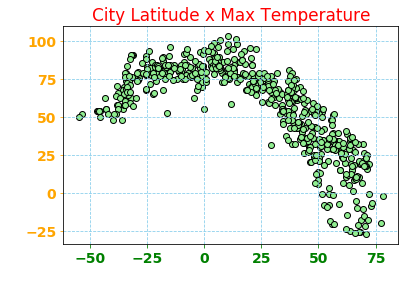

In [26]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="lightgreen")
plt.title("City Latitude x Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="--",color="skyblue")
plt.savefig("plot_images/scat_lat_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

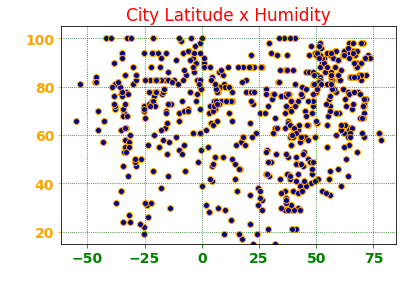

In [27]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="orange",facecolors="darkblue")
plt.title("City Latitude x Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle=":",color="darkgreen")
plt.savefig("plot_images/scat_lat_hum.png")
plt.show()

#### Latitude vs. Cloudiness Plot

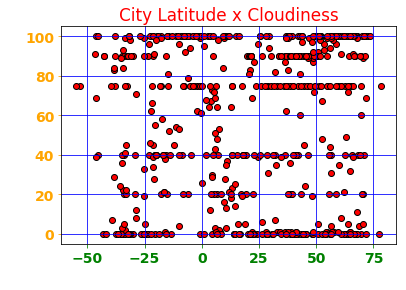

In [28]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="red")
plt.title("City Latitude x Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="blue")
plt.savefig("plot_images/scat_lat_cloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

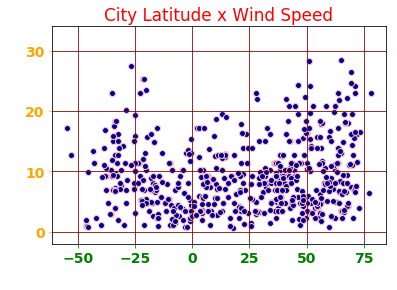

In [29]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="pink",facecolors="darkblue")
plt.title("City Latitude x Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="maroon")
plt.savefig("plot_images/scat_lat_wind.png")
plt.show()

###Conclusions:


    1. The weather does become warmer closer to the equator
    2. Temperature is largely correlated with latitude.
    3. There is not a relationship between latitude and humidity. 
    4. There is not a relationship between latitude and cloudiness.
    5. There is not a relationship between latitude and wind speed.
    6. Wind speed is usually below 15 mph. 
    7. Clouds tend to group along predictable amounts of cover. Or, the measuring tools used cannot distinguish between more finite levels of cloud cover. 


* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression


y = -1.28x + 99.09


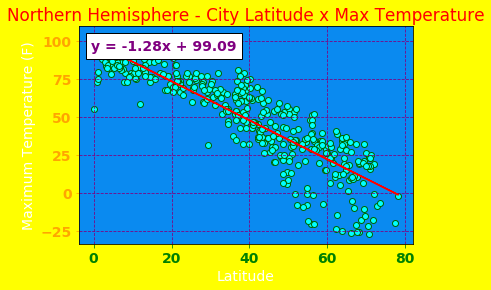

In [38]:
from scipy.stats import linregress
from matplotlib.offsetbox import AnchoredText

northern_lats_df = weather_dataframe[weather_dataframe['Lat'] >= 0]

fig1, ax1 = plt.subplots()
ax1.set_facecolor((.04, .54, 0.94))
fig1.patch.set_facecolor('yellow')

plt.rcParams['text.color'] = 'purple'

plt.scatter(northern_lats_df["Lat"],northern_lats_df["Max Temp"],edgecolors="darkgreen",facecolors="aqua")
plt.title("Northern Hemisphere - City Latitude x Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="--",color="purple")

x_values = northern_lats_df["Lat"]
y_values = northern_lats_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.plot(x_values,regress_values,"r-")
anchored_text = AnchoredText(line_eq, loc=2)
ax1.add_artist(anchored_text)


plt.savefig("plot_images/linreg_north_lat_temp.png")


plt.show()



**Southern Hemisphere - Max Temp vs. Latitude Linear Regression**

y = 0.55x + 87.35


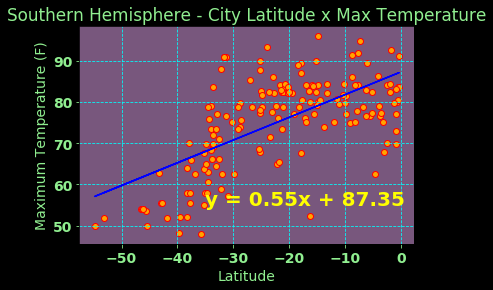

In [40]:
from scipy.stats import linregress
from matplotlib.offsetbox import AnchoredText

northern_lats_df = weather_dataframe[weather_dataframe['Lat'] <= 0]

fig1, ax1 = plt.subplots()
ax1.set_facecolor((.47, .34, 0.49))
fig1.patch.set_facecolor('black')


plt.rcParams['text.color'] = 'lightgreen'
plt.rcParams['axes.labelcolor'] = 'lightgreen'
plt.rcParams['xtick.color'] = 'lightgreen'
plt.rcParams['ytick.color'] = 'lightgreen'


plt.scatter(northern_lats_df["Lat"],northern_lats_df["Max Temp"],edgecolors="red",facecolors="orange")
plt.title("Southern Hemisphere - City Latitude x Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="--",color="aqua")

x_values = northern_lats_df["Lat"]
y_values = northern_lats_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.plot(x_values,regress_values,"b-")
# anchored_text = AnchoredText(line_eq, loc=2)
ax1.annotate(line_eq,(-35, 55),fontsize=20,color="yellow")
# ax1.add_artist(anchored_text)


plt.savefig("plot_images/linreg_south_lat_temp.png")


plt.show()



**Northern Hemisphere - Humidity (%) vs. Latitude**

y = 0.33x + 53.19


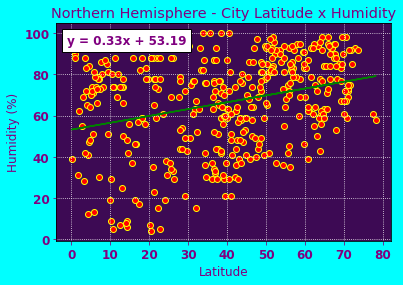

In [42]:

from scipy.stats import linregress
from matplotlib.offsetbox import AnchoredText

northern_lats_df = weather_dataframe[weather_dataframe['Lat'] >= 0]

fig1, ax1 = plt.subplots()
ax1.set_facecolor((.24, .04, 0.33))
fig1.patch.set_facecolor('aqua')

plt.rcParams['text.color'] = 'purple'
plt.rcParams['axes.labelcolor'] = 'purple'
plt.rcParams['xtick.color'] = 'purple'
plt.rcParams['ytick.color'] = 'purple'
# fig = plt.figure()
# ax=fig.add_subplot(111)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}	
plt.rc('font', **font)


plt.scatter(northern_lats_df["Lat"],northern_lats_df["Humidity"],edgecolors="yellow",facecolors="red")
plt.title("Northern Hemisphere - City Latitude x Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle=":",color="white")

x_values = northern_lats_df["Lat"]
y_values = northern_lats_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.plot(x_values,regress_values,"g-")
anchored_text = AnchoredText(line_eq, loc=2)
# ax1.annotate(line_eq,(25, 10),fontsize=10,color="red")
ax1.add_artist(anchored_text)

plt.savefig("plot_images/linreg_north_lat_hum.png")

plt.show()


**Southern Hemisphere - Humidity (%) vs. Latitude**

y = 0.25x + 76.92


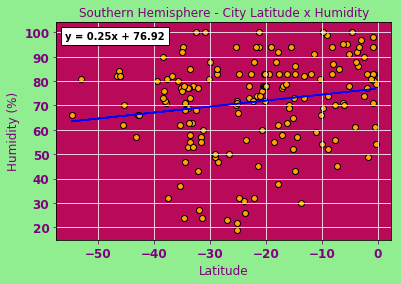

In [43]:
from scipy.stats import linregress
from matplotlib.offsetbox import AnchoredText

northern_lats_df = weather_dataframe[weather_dataframe['Lat'] <= 0]

fig1, ax1 = plt.subplots()
ax1.set_facecolor((.72, .04, 0.35))
fig1.patch.set_facecolor('lightgreen')


plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}	
plt.rc('font', **font)


plt.scatter(northern_lats_df["Lat"],northern_lats_df["Humidity"],edgecolors="black",facecolors="orange")
plt.title("Southern Hemisphere - City Latitude x Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="white")

x_values = northern_lats_df["Lat"]
y_values = northern_lats_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.plot(x_values,regress_values,"b-")
anchored_text = AnchoredText(line_eq, loc=2)
# ax1.annotate(line_eq,(-35, 55),fontsize=20,color="orange")
ax1.add_artist(anchored_text)

plt.savefig("plot_images/linreg_south_lat_hum.png")

plt.show()



**Northern Hemisphere - Cloudiness (%) vs. Latitude**






y = 0.32x + 44.41


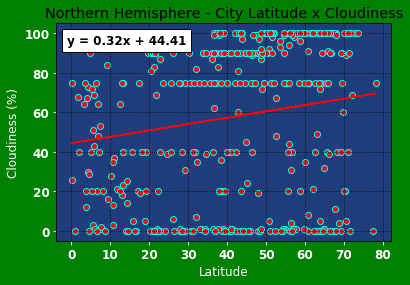

In [45]:

from scipy.stats import linregress
from matplotlib.offsetbox import AnchoredText

northern_lats_df = weather_dataframe[weather_dataframe['Lat'] >= 0]

fig1, ax1 = plt.subplots()
ax1.set_facecolor((.12, .24, 0.48))
fig1.patch.set_facecolor('green')

plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
# fig = plt.figure()
# ax=fig.add_subplot(111)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}	
plt.rc('font', **font)


plt.scatter(northern_lats_df["Lat"],northern_lats_df["Cloudiness"],edgecolors="aqua",facecolors="red")
plt.title("Northern Hemisphere - City Latitude x Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle=":",color="black")

x_values = northern_lats_df["Lat"]
y_values = northern_lats_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.plot(x_values,regress_values,"r-")
anchored_text = AnchoredText(line_eq, loc=2)
# ax1.annotate(line_eq,(25, 10),fontsize=10,color="red")
ax1.add_artist(anchored_text)

plt.savefig("plot_images/linreg_north_lat_cloud.png")

plt.show()


**Southern Hemisphere - Cloudiness (%) vs. Latitude**

y = 0.73x + 73.65


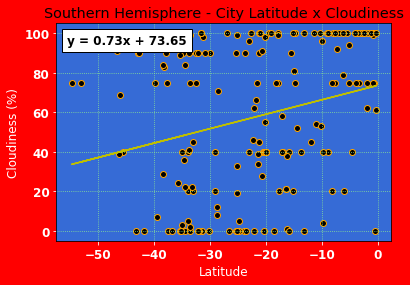

In [35]:

from scipy.stats import linregress
from matplotlib.offsetbox import AnchoredText

northern_lats_df = weather_dataframe[weather_dataframe['Lat'] <= 0]

fig1, ax1 = plt.subplots()
ax1.set_facecolor((.21, .42, 0.84))
fig1.patch.set_facecolor('red')

plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'darkblue'
plt.rcParams['xtick.color'] = 'blue'
plt.rcParams['ytick.color'] = 'yellow'
# fig = plt.figure()
# ax=fig.add_subplot(111)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}	
plt.rc('font', **font)


plt.scatter(northern_lats_df["Lat"],northern_lats_df["Cloudiness"],edgecolors="orange",facecolors="black")
plt.title("Southern Hemisphere - City Latitude x Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="dotted",color="lightgreen")

x_values = northern_lats_df["Lat"]
y_values = northern_lats_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.plot(x_values,regress_values,"y-")
anchored_text = AnchoredText(line_eq, loc=2)
# ax1.annotate(line_eq,(25, 10),fontsize=10,color="red")
ax1.add_artist(anchored_text)

plt.savefig("plot_images/linreg_south_lat_cloud.png")

plt.show()


**Northern Hemisphere - Wind Speed (mph) vs. Latitude**

y = 0.07x + 6.78


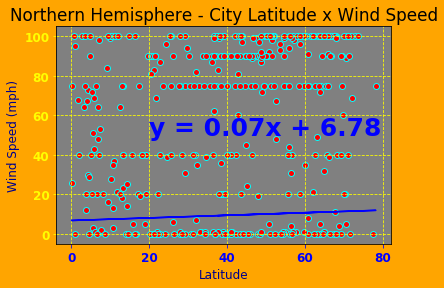

In [36]:

from scipy.stats import linregress
from matplotlib.offsetbox import AnchoredText

northern_lats_df = weather_dataframe[weather_dataframe['Lat'] >= 0]

fig1, ax1 = plt.subplots()
ax1.set_facecolor((.50, .50, 0.50))
fig1.patch.set_facecolor('orange')

plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'blue'
plt.rcParams['ytick.color'] = 'red'
# fig = plt.figure()
# ax=fig.add_subplot(111)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}	
plt.rc('font', **font)


plt.scatter(northern_lats_df["Lat"],northern_lats_df["Cloudiness"],edgecolors="aqua",facecolors="red")
plt.title("Northern Hemisphere - City Latitude x Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both", linestyle="dashed",color="yellow")

x_values = northern_lats_df["Lat"]
y_values = northern_lats_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.plot(x_values,regress_values,"b-")
# anchored_text = AnchoredText(line_eq, loc=2)
# ax1.add_artist(anchored_text)
ax1.annotate(line_eq,(20, 50),fontsize=25,color="blue")

plt.savefig("plot_images/linreg_north_lat_wind.png")

plt.show()


**Southern Hemisphere - Wind Speed (mph) vs. Latitude**

y = -0.08x + 7.04


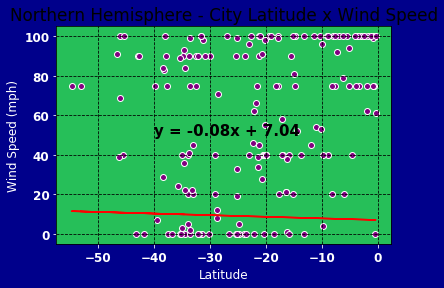

In [46]:

from scipy.stats import linregress
from matplotlib.offsetbox import AnchoredText

northern_lats_df = weather_dataframe[weather_dataframe['Lat'] <= 0]

fig1, ax1 = plt.subplots()
ax1.set_facecolor((.15, .75, 0.35))
fig1.patch.set_facecolor('darkblue')

plt.rcParams['text.color'] = 'red'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'green'
plt.rcParams['ytick.color'] = 'orange'
# fig = plt.figure()
# ax=fig.add_subplot(111)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}	
plt.rc('font', **font)

plt.scatter(northern_lats_df["Lat"],northern_lats_df["Cloudiness"],edgecolors="white",facecolors="purple")
plt.title("Northern Hemisphere - City Latitude x Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both", linestyle="dashed",color="black")

x_values = northern_lats_df["Lat"]
y_values = northern_lats_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.plot(x_values,regress_values,"r-")
# anchored_text = AnchoredText(line_eq, loc=2)
# ax1.add_artist(anchored_text)
ax1.annotate(line_eq,(-40, 50),fontsize=15,color="black")

plt.savefig("plot_images/linreg_south_lat_wind.png")

plt.show()


###Conclusions 
    1. Closeness to the equator is directly correlated with higher temperatures in both the northern and southern hemispheres. 
    2. In the northern hemisphere, humidity rises as you move away from the equator. 
    3. In the southern hemisphere, humidity lowers as you move away from the equator. 
    4. In both the northern and southern hemisphere, cloud cover follows the same pattern as humidity. 
    5. Wind speed tends to increase slightly away from the equator.
